# SVM for regression

The Lagrangian function of SVM regression problem is given by

$$L(\mathbf{a},\mathbf{\hat{a}}) = -\frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N (a_n - \hat{a}_n)(a_m - \hat{a}_m) k(\mathbf{x}_n,\mathbf{x}_m) - \epsilon\sum_{n=1}^N (a_n+\hat{a}_n) + \sum_{n=1}^N(a_n-\hat{a}_n)t_n$$

And our goal is to solve the following problem by making use of SMO.

$$\underset{0\leqslant\mathbf{a}\leqslant C, 0\leqslant\mathbf{\hat{a}}\leqslant C}{\quad max\quad } L \quad s.t.\ \sum_{n=1}^N (a_n - \hat{a}_n) = 0 \quad\text{and}\quad 
\left\{\begin{array}{ll}
\text{if } a_n\neq 0, &\hat{a}_n = 0\\
\text{if } \hat{a}_n\neq 0, &a_n = 0\\
\end{array}\right.$$

Let $\lambda_n = a_n - \hat{a}_n$, by considering the constraint of these multipliers, we have $|\lambda_n| = a_n + \hat{a}_n$, and the range of $\lambda_n$ is $[-C, C]$. We can then sustitute $\lambda_n$ in to the Lagrangian function to obtain

$$L = -\frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N \lambda_n\lambda_m k(\mathbf{x}_n,\mathbf{x}_m) - \epsilon\sum_{n=1}^N |\lambda_n| + \sum_{n=1}^N\lambda_n t_n$$

Now our goal becomes

$$\underset{-C\leqslant\mathbf{\lambda}\leqslant C}{max} L \quad s.t.\ \sum_{n=1}^N \lambda_n = 0$$

which is equivalent to 

$$\underset{-C\leqslant\mathbf{\lambda}\leqslant C}{min} \Psi \quad s.t.\ \sum_{n=1}^N \lambda_n = 0\qquad \text{where}\quad \Psi = -L$$

--------------------

# KKT Conditions

The KKT conditions are from Lagrange multipler and are significant for SVM and SMO. The KKT conditions for the QP problem are particularly simple. The QP problem is solved when, for all $i$:

$$
\begin{array}{ll}
a_n = 0\text{ and }\hat{a}_n=0 &\Leftrightarrow &\lambda_n = 0 &\Leftrightarrow & |y_n - t_n|<\epsilon \\
0< (a_n \text{ or } \hat{a}_n)< C &\Leftrightarrow& 0<|\lambda_n|<C &\Leftrightarrow & |y_n - t_n|=\epsilon \\
(a_n \text{ or } \hat{a}_n) = C &\Leftrightarrow& |\lambda_n|=C &\Leftrightarrow & |y_n - t_n|>\epsilon 
\end{array}$$

where

- Points with $\lambda_n = 0$ are inside the $\epsilon$-tube.
- Points with $0<|\lambda_n|<C$ are at the boundary of the tube and support the tube.
- Points with $|\lambda_n| = C$ are outside the $\epsilon$-tube.


---------------

# SMO

Sequential Minimal Optimization (SMO) is a simple algorithm that can quickly solve the SVM QP (quadratic programming) problem without any extra matrix storage and without using numerical QP optimization steps at all. <font color='red'>SMO decomposes the overall QP problem into QP sub-problems</font>, using Osuna's theorem to ensure convergence.


## Smallest SVM QP problem

SMO chooses to solve the smallest possible optimization problem at every step. For the standard SVM QP problem, <font color='red'>the smallest possible optimization problem involves two parameters, because these parameters must obey a linear equality constraint.</font>

$$\sum_{n=1}^N \lambda_n = 0 \tag{2}$$

It is nonsense to choose only one parameter for optimization, because if so, $a_n$ has to be fixed for suiting the linear equality constraint such that we cannot optimize the parameter $a_n$. Hence, at every step, SMO chooses two parameters to jointly optimize.

$$\lambda_1 + \lambda_2 = - \sum_{n\neq 1,2}^N \lambda_n=w \tag{3}$$

where the sumation of $\lambda_1 + \lambda_2$ is fixed. And the optimized parameters $\lambda_1^{new}$ and $\lambda_2^{new}$ has to be subject to the same constraint

$$\lambda_1^{new} + \lambda_2^{new} = \lambda_1 + \lambda_2 = w \tag{4}$$

in order to keep meeting the linear equality constraint.


## Ranges of $\lambda_1$ and $\lambda_2$

There are two constriants on $a_1$ and $a_2$:

$$\begin{array}{ll}
\text{KKT requirement}&-C\leqslant \lambda_n \leqslant C\qquad \text{where}\quad n=1,\cdots,N\\
\text{linear equality constraint} &\lambda_1 + \lambda_2 = w
\end{array} \tag{5}$$

The KKT condition requires the point $(\lambda_2, \lambda_1)$ to lie in the square with length $2C$. And the linear equality constraint requires the point $(\lambda_2, \lambda_1)$ lie on the line that is denoted by $\lambda_1 + \lambda_2 = w$.

### Range of $\lambda_2$

$$\left.\begin{array}{ll}
\text{KKT requirement on }\lambda_1 &-C\leqslant \lambda_1 \leqslant C\\
\text{linear equality constraint} &\lambda_2 = w - \lambda_1
\end{array}\right\}
\Rightarrow 
\lambda_2 \in
[w-C, w+C] \tag{6}$$

And $\lambda_2$ must also be in the range $[-C, C]$, hence

$$\bbox[#e0f0ff]{a_2 \in [L, H]\qquad \text{where}\quad
\left\{\begin{array}{ll}
L=max(w-C, -C) \\
H=min(w+C, C)
\end{array}\right.}\tag{7}$$


### Range of $\lambda_1$

We shall use the linear equation $\lambda_1 + \lambda_2 = w$ to evaluate the value of $\lambda_1$. As long as $\lambda_2\in [L, H]$, the $\lambda_1$ that derives from $\lambda_2$ will also lie in the range of $[-C, C]$ and obey the linear equality constraint.


*If $L\geqslant H$, we cannot take the subsequent steps to optimize the pair of $\lambda_1$ and $\lambda_2$.*


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

REC_LINES = np.array([[-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1]])
SLANT_LINE_X = np.array([-2, 2])

def hide_axes(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    
def draw_rec(ax):
    hide_axes(ax)
    ax.plot(REC_LINES[0], REC_LINES[1])
    ax.set_xticks([])
    ax.set_yticks([])

def draw_line(ax, sign, k):
    x = SLANT_LINE_X
    y = k - sign*x
    ax.plot(x, y)
    
def draw_range(ax, xstart, xend, y):
    ax.annotate(
        '', xy=(xstart, y), xycoords='data',
        xytext=(xend, y), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':'r'})
    ax.text(xstart+(xend-xstart-.5)/2, y-.2, r"Range of $\lambda_2$", fontsize=14, color='r')

def main():
    fig=plt.figure(figsize=(12,5), dpi=50)
    (ax1,ax2) = fig.subplots(1, 2)
    draw_rec(ax1)
    draw_rec(ax2)
    
    ax1.set_xticks([-1, 1])
    ax1.set_yticks([-1, 1])
    ax1.set_xticklabels([r"$\lambda_2 = -C$", r"$\lambda_2 = C$"], fontsize=15)
    ax1.set_yticklabels([r"$\lambda_1 = -C$", r"$\lambda_1 = C$"], fontsize=15)
    
    K = np.array([-.5, .5])
    S = np.array([-1, -1])
    draw_line(ax1, S[0], K[0])
    draw_line(ax2, S[1], K[1])
    
    i = 0
    for ax in [ax1, ax2]:
        xnc = S[i]*K[i] - S[i]*-1
        xpc = S[i]*K[i] - S[i]*1
        # print(x0, xc)
        l = min(xnc, xpc)
        h = max(xnc, xpc)
        L = max(-1, l)
        H = min(1, h)
        draw_range(ax, L, H, -1.1)
        i+=1
    
    plt.show()
    return

if __name__=="__main__":
    main()



## Determine $a_2$

Firstly, we shall extract the terms that related to $\lambda_1$ and $\lambda_2$ from the objective function.

$$\begin{align*}
\Psi &= \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N \lambda_n\lambda_m k(\mathbf{x}_n,\mathbf{x}_m) + \epsilon\sum_{n=1}^N |\lambda_n| - \sum_{n=1}^N\lambda_n t_n\\
&=\underbrace{\frac{1}{2}\lambda_1 \lambda_1 k_{11} + \frac{1}{2}\lambda_2 \lambda_2 k_{22} + \lambda_1 \lambda_2 k_{12} + \lambda_1\sum_{n\neq 1,2}^N \lambda_n k_{1n} + \lambda_2\sum_{n\neq 1,2}^N \lambda_n k_{2n} + \epsilon(|\lambda_1| + |\lambda_2|) - \lambda_1t_1 - \lambda_2 t_2}_{\lambda_1,\lambda_2 \text{ related entries}\qquad \text{where }k_{ij}=k(\mathbf{x}_i,\mathbf{x}_j)} + constant\\
&=\underbrace{\frac{1}{2}\lambda_1^2 k_{11} + \frac{1}{2}\lambda_2^2 k_{22} + \lambda_1 \lambda_2 k_{12} + lambda_1 v_1 + \lambda_2 v_2 + \epsilon(|\lambda_1| + |\lambda_2|) - \lambda_1t_1 - \lambda_2 t_2}_{\text{where } v_i=\sum_{n\neq 1,2}^N \lambda_n k_{in}} + constant\\
&=\underbrace{\frac{1}{2}(w-\lambda_2)^2k_{11} + \frac{1}{2}\lambda_2^2k_{22} + (w-\lambda_2)\lambda_2k_{12} + (w-\lambda_2) v_1 + \lambda_2 v_2 + \epsilon(|w-\lambda_2|+|\lambda_2|) - (w-\lambda_2)t_1 - \lambda_2 t_2}_{\lambda_1+\lambda_2 = w} + constant\\
\end{align*} \tag{9}$$

which is a quadratic function over $\lambda_2$, and $\lambda_1$ has been transfered to the form denoted by $\lambda_2$ due to the constraint that <font color='red'>the sumation of $\lambda_1$ and $\lambda_2$ is fixed</font>.

### First-order derivative

We can take the first-order derivative of $\Psi$ with respect to $\lambda_2$ to obtain

$$\frac{d\Psi}{d\lambda_2} = -k_{11}(w-\lambda_2) + k_{22}\lambda_2 - k_{12}\lambda_2 + k_{12}(w-\lambda_2) - v_1 + v_2 + \epsilon(-sgn(w-\lambda_2)+sgn(\lambda_2)) + t_1 - t_2 \tag{11}$$


However, this function is not continuous due to the $sgn$ function, we therefore have to deal with several segments of the function separately.

### Second-order derivative

The second-order derivative of $\Psi$ with respect to $\lambda_2$ is given by

$$\frac{d^2\Psi}{d\lambda_2^2} = k_{11} + k_{22} - k_{12} - k_{12} \tag{12}$$

Here we only consider the case that the kernel function satisfy the Mercer's conditions, which require the kernel $K$ is continuous and is given by

$$k_{mn} = K(\mathbf{x}_n, \mathbf{x}_m) = \phi(\mathbf{x}_n)^T\phi(\mathbf{x}_m)$$

With the Mercer's conditions, the second-order derivatives will always be positive provided $\mathbf{x}_1$ not equal to $\mathbf{x}_2$.

$$\begin{align*}\eta = \frac{d^2\Psi}{d\lambda_2^2} &= k_{11} + k_{22} - 2k_{12}\\
&= \phi(\mathbf{x}_1)^T\phi(\mathbf{x}_1) + \phi(\mathbf{x}_2)^T\phi(\mathbf{x}_2) - 2\phi(\mathbf{x}_1)^T\phi(\mathbf{x}_2) \\
&= \big(\phi(\mathbf{x}_1) - \phi(\mathbf{x}_2)\big)^2\\
&>0\qquad \text{if }\mathbf{x}_1\neq \mathbf{x}_2
\end{align*}$$

Moreover, after adjustment, the first-order derivative with respect to $\lambda_2$ takes the form 

$$\frac{d\Psi}{d\lambda_2} = \eta \lambda_2 + \epsilon(-sgn(w-\lambda_2)+sgn(\lambda_2)) + constant$$

which is a discontinuous first-degree function of $\lambda_2$ with a positive gradient, and can be depict as follows.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


f = lambda x, eta, w, epsilon: eta*x + epsilon*(-np.sign(w-x) + np.sign(x)) + 1

def draw_line(ax, eta, w, epsilon, L, H):
    if w > 0:
        s1 = 0
        s2 = w
        left_text = r'$\lambda_1>0$, $\lambda_2<0$'
        mid_text = r'$\lambda_1>0$, $\lambda_2>0$'
        right_text = r'$\lambda_1<0$, $\lambda_2<0$'
        s1_text = r'$\lambda_2 = 0$'
        s2_text = r'$\lambda_2 = w$'
    elif w <= 0:
        s1 = w
        s2 = 0
        left_text = r'$\lambda_1>0$, $\lambda_2<0$'
        mid_text = r'$\lambda_1<0$, $\lambda_2<0$'
        right_text = r'$\lambda_1<0$, $\lambda_2>0$'
        s1_text = r'$\lambda_2 = w$'
        s2_text = r'$\lambda_2 = 0$'
    
    x = np.linspace(-10, s1, 100)[:-1]
    y = f(x, eta, w, epsilon)
    ax.plot(x, y)
    
    x = s1
    ys1 = f(x, eta, w, epsilon)
    ax.scatter(x, ys1, s=20, color='C4')    
    
    x = np.linspace(s1, s2, 100)[1:-1]
    y = f(x, eta, w, epsilon)
    ax.plot(x, y)
    
    x = s2
    ys2 = f(x, eta, w, epsilon)
    ax.scatter(x, ys2, s=20, color='C5') 
    
    x = np.linspace(s2, 10, 100)[1:]
    y = f(x, eta, w, epsilon)
    ax.plot(x, y)
    
    YL = f(L, eta, w, epsilon)-.5
    draw_range(ax, L, s1, YL, left_text, 3, 'C0')
    if w != 0:
        draw_range(ax, s1, s2, YL, mid_text, 4, 'C1')
    draw_range(ax, s2, H, YL, right_text, 3, 'C2')
    if w != 0:
        draw_arrow(ax, s1, ys2, ys1, s1_text, -.7, 'C4')
        draw_arrow(ax, s2, ys1, ys2, s2_text, -.7, 'C5')
    else:
        draw_arrow(ax, s2, ys1+4, ys1-1, s2_text, -.7, 'C5')

    
def draw_range(ax, xstart, xend, y, text, adjust, color):
    ax.annotate(
        '', xy=(xstart, y), xycoords='data',
        xytext=(xend, y), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':color})
    ax.text(xstart+(xend-xstart-adjust)/2, y-1, text, fontsize=13, color=color)
    
def draw_arrow(ax, x, ystart, yend, text, adjust, color):
    if ystart > yend:
        delta_y = 1
    else:
        delta_y = -1
    ax.annotate(
        '', xy=(x, yend+1.5*delta_y), xycoords='data',
        xytext=(x, ystart), textcoords='data',
        arrowprops={'arrowstyle': '->', 'color':color})
    ax.text(x+adjust, ystart+delta_y*.5, text, fontsize=13, color=color)

def draw_pict(ax, w, C, eta, epsilon):
    L = max(-C, w-C)
    H = min(C, w+C)
    
    ax.set_xlim(L, H)
    ax.set_ylim(f(L, eta, w, epsilon)-2, f(H, eta, w, epsilon)+1)
    ax.set_xlabel(r"$\lambda_2$", fontsize=14, color='grey')
    ax.set_ylabel(r"$\frac{d\Psi}{d\lambda_2}$", fontsize=18, color='grey')
    
    if w > 0:
        s1 = 0
        s2 = w
        s1_text = r'$0$'
        s2_text = r'$w$'
    elif w < 0:
        s1 = w
        s2 = 0
        s1_text = r'$w$'
        s2_text = r'$0$'
    else:
        s1 = s2 = 0
        s1_text = s2_text = r'$w=0$'
    ax.set_xticks([L, s1, s2, H])
    ax.set_yticks([])
    ax.set_xticklabels([r"$L$", s1_text, s2_text, r"$H$"], fontsize=15)
    
    draw_line(ax, eta, w, epsilon, L, H)
    
def main():
    fig=plt.figure(figsize=(21,4), dpi=50)
    ax1, ax2, ax3 = fig.subplots(1, 3)
    
    eta = .3
    epsilon = 1
    C = 10
    
    ax1.set_title('w > 0')
    w = 6
    draw_pict(ax1, w, C, eta, epsilon)
    
    ax2.set_title('w < 0')
    w = -6
    draw_pict(ax2, w, C, eta, epsilon)
    
    ax3.set_title('w = 0')
    w = 0
    draw_pict(ax3, w, C, eta, epsilon)
    
    plt.show()
    return

if __name__=="__main__":
    main()





 we can make use of the Newton method which is given by a closed form to obtain the optimum of $\lambda_2$.

$$\lambda_2^{new} = \lambda_2 - (\frac{d^2 \Psi}{d \lambda_2^2})^{-1}\frac{d\Psi}{d\lambda_2} \tag{10}$$


Note that only if the second derivative is possitive, which is the usual case, we can get the correct $\lambda_2$, because we have assumed that this is a positive quadratic function and we are looking for the minimum of $\lambda_2$.

With these conditions, we can evaluate the new value of $\lambda_2$ to minimize the objective function $\Psi$.

$$\begin{align*}
\lambda_2^{new} &= \lambda_2 - \frac{ -k_{11}(w-\lambda_2) + k_{22}\lambda_2 - k_{12}\lambda_2 + k_{12}(w-\lambda_2) - v_1 + v_2 + \epsilon(-sgn(w-\lambda_2)+sgn(\lambda_2)) + t_1 - t_2 }{\eta}\qquad\text{let }\bbox[#e0f0ff]{\eta=k_{11} + k_{22} - 2k_{12}}\\
&= \lambda_2 -\frac{-k_{11}\lambda_1 + k_{22}\lambda_2 - k_{12}\lambda_2 + k_{12}\lambda_1 - v_1 + v_2 + \epsilon(-sgn(\lambda_1)+sgn(\lambda_2)) + t_1 - t_2 }{\eta}\\
&= \lambda_2 -\frac{-\big(k_{11}\lambda_1 + k_{12}\lambda_2 + v_1 - t_1\big)+ \big(k_{22}\lambda_2 + k_{12}\lambda_1 + v_2 -t_2\big) + \epsilon(-sgn(\lambda_1)+sgn(\lambda_2)) }{\eta}\\
&= \lambda_2 -\frac{-\big(\sum_{n=1}^N \lambda_n k_{1n}-t_1\big) + \big(\sum_{n=1}^N \lambda_nk_{2n}-t_2\big) + \epsilon(-sgn(\lambda_1)+sgn(\lambda_2))}{\eta}\\
&= \lambda_2 +\frac{\big(\sum_{n=1}^N \lambda_nk_{1n} + b - t_1\big) - \big(\sum_{n=1}^N \lambda_nk_{2n} + b - t_2\big)- \epsilon(-sgn(\lambda_1)+sgn(\lambda_2))}{\eta}\\
&= \lambda_2 +\frac{\big(y_1 - t_1\big) - \big(y_2 - t_2\big)+ \epsilon(sgn(\lambda_1)-sgn(\lambda_2))}{\eta}\\
&= \bbox[#e0f0ff]{\lambda_2 + \frac{E_1-E_2+ \epsilon(sgn(\lambda_1)-sgn(\lambda_2))}{\eta}\qquad \text{let } E_1 = y_1-t_1\quad E_2 = y_2-t_2} \tag{13}
\end{align*} $$

The obtained $\lambda_2$ is then clipped by the constraints $L$ and $H$.

$$\bbox[#e0f0ff]{
\lambda_2^{new} = \left\{\begin{array}{ll}
H &if &\lambda_2^{new} \geqslant H\\
\lambda_2^{new} &if & L<\lambda_2^{new}<H\\
L &if &\lambda_2^{new} \leqslant L
\end{array}\right.} \tag{14}$$



### Non-positive second-order derivative




## Determine $a_1$

With $\lambda_2^{new}$, we can derive the new value of $\lambda_1$ from the constraint

$$\bbox[#e0f0ff]{\lambda_1^{new} = \lambda_1 + \lambda_2-\lambda_2^{new}} \tag{18}$$


## Output function update

From the updating equation of $a_2$, we notice that each update of $a_2$ needs the outputs $y_1$ and $y_2$. The output function is given by

$$y(\mathbf{x}) = \sum_{n=1}^N \lambda_n k(\mathbf{x},\mathbf{x}_n) + b \tag{19}$$

where $a_1$ and $a_2$ have updated, and the remaining term is the threshold $b$. The threshold $b$ is given by

$$b = \frac{1}{N_{\mathcal{M}}}\sum_{n\in\mathcal{M}}\left(t_n - \sum_{m\in\mathcal{S}}\lambda_m k(\mathbf{x}_n, \mathbf{x}_m)\right) \tag{20}$$

where $\mathcal{M}$ denote the set of the indices of which parameters satisfy $0<|\lambda_n|<C$, and $\mathcal{S}$ denote the set of the indices of which parameters satisfy $|\lambda_m|>0$. We can use this equation to compute the initial $b$. However, for each update of $b$, its worst computational complexity is $O(N^2)$. 

Here we shall introduce a simple and efficient method to update $b$. This method derives from the KKT conditions. 

$$0<|\lambda_n|<C \Leftrightarrow |y_n - t_n| = \epsilon \tag{21}$$

Recall that $\lambda_n = a_n - \hat{a}_n$, where $a_n$ and $\hat{a}_n$ subject to the constrinat $\left\{\begin{array}{ll}
\text{if } a_n\neq 0, &\hat{a}_n = 0\\
\text{if } \hat{a}_n\neq 0, &a_n = 0\\
\end{array}\right.$. As a result, we can eliminate the absolute operation to obtain

$$\begin{array}{ll}
\text{if }0<\lambda_i <C , & E_i = y_i - t_i = -\epsilon\\
\text{if }-C<\lambda_i<0 , & E_i = y_i - t_i = \epsilon
\end{array}$$

which implies that when $\lambda_i$ or $\lambda_2$ is not at the bounds, the QP sub-problem over $\lambda_1$ and $\lambda_2$ can be solved by forcing $y_1$ or $y_2$ to satisfing $|y_i - t_i| = \epsilon$, which can be achived by modifying $b$.

When $0<\lambda_i <C$,

$$\begin{align*}
-\epsilon = E_i^{new} &= E_i + \Delta E_i\\
&= E_i + \Big(\Delta \lambda_1 k(\mathbf{x}_i, \mathbf{x}_1) + \Delta \lambda_2 k(\mathbf{x}_i, \mathbf{x}_2) + \Delta b\Big) \tag{22}\\
-\Delta b &= E_i + \Delta \lambda_1 k(\mathbf{x}_i, \mathbf{x}_1) + \Delta \lambda_2 k(\mathbf{x}_i, \mathbf{x}_2) +\epsilon \tag{23}
\end{align*}$$

When $-C<\lambda_i <0$,

$$\begin{align*}
\epsilon = E_i^{new} &= E_i + \Delta E_i\\
&= E_i + \Big(\Delta \lambda_1 k(\mathbf{x}_i, \mathbf{x}_1) + \Delta \lambda_2 k(\mathbf{x}_i, \mathbf{x}_2) + \Delta b\Big) \tag{22}\\
-\Delta b &= E_i + \Delta \lambda_1 k(\mathbf{x}_i, \mathbf{x}_1) + \Delta \lambda_2 k(\mathbf{x}_i, \mathbf{x}_2) - \epsilon \tag{23}
\end{align*}$$

Then we can obtain the new threshold $b^{new}$ 

$$\bbox[#e0f0ff]{
b^{new} = \left\{\begin{array}{ll}
- E_i -  (\lambda_1^{new} - \lambda_1) k(\mathbf{x}_i, \mathbf{x}_1) - (\lambda_2^{new} -\lambda_2) k(\mathbf{x}_i, \mathbf{x}_2) - \epsilon + b & \text{if }0<\lambda_i <C\\
- E_i -  (\lambda_1^{new} - \lambda_1) k(\mathbf{x}_i, \mathbf{x}_1) - (\lambda_2^{new} -\lambda_2) k(\mathbf{x}_i, \mathbf{x}_2) + \epsilon + b & \text{if }-C<\lambda_i <0
\end{array}\right.}$$


We shall obtain two thresholds, $b_1^{new}$ for $\lambda_1^{new}$ and $b_2^{new}$ for $\lambda_2^{new}$. 
- When the new parameters $\lambda_1^{new}$ and $\lambda_2^{new}$ are both not at the bounds, these two thresholds are equal, and the new thresholds is set to be $b^{new} = b_1^{new} = b_2^{new}$.
- When there is only one parameter not at the bound, SMO chooses the threshold of which parameter not at the bound.
- When two parameters are both at the bound, SMO chooses the threshold to be halfway between $b_1^{new}$ and $b_2^{new}$.


## How to pick $\lambda_1$ and $\lambda_2$

In the previous part we mainly focus on how to evaluate the value of $\lambda_2$, however, the effects on $\lambda_1$ and on $\lambda_2$ are analogous, because this process is looking for the optimum of $\lambda_1$ and $\lambda_2$ that lie in the region of $[-C, C]$ and obey the linear equality constraints as well as minimize the objective function. Note that this is a local optimum, because the linear equality constraint depends on $\lambda_1 + \lambda_2 = w$, where $w$ will change along the SMO progresses and be stable finally.

As a result, we may need multiple loops of optimizations to obtain the final result.

### Pick the first parameter

The outer loop picks $\lambda$ following the rules below.

1. In the first loop, we shall pick every $\lambda_n$ as the first parameter because they are just initialized.
2. In the subsequent loops, we shall pick the non-bound $\lambda_n$ as the first parameter because these examples are most likely to violate the KKT conditions. We keep running this step until all the non-bound $\lambda_n$ obey the KKT conditions.
3. In the last loop, we shall pick every $\lambda_n$ as the first parameter for KKT condition validation. If the validation fails, step 2 is invoked again.

And before going into the inner loop to pick the second parameter, we shall check if the picked first parameter violate the KKT conditions. If not, we should discard the parameter and continue to the next iteration. <font color='red'>In a word, the first picked parameter has to be KKT conditions violated, because the Osuna's theorem suggests that only if at least one of the parameter violated the KKT conditions the optimization process can decrease the objective function.</font>

### Pick the second parameter

The goal of the inner loop is to pick one parameter from the array of parameters. Now suppose that the index of the first parameter is given by $i$ and $j$ denote the index of the second parameter that will be selected. The order of selection should follow the rules as follows.

1. SMO firstly select the parameter on the index $j$, where $j$ gives the biggest $|E_1 - E_2|$, namely $|E_i - E_j|$. Because SMO want to maximize the size of step taken during joint optimization. From equation (13), we know that the step size is given by $\frac{|E_1 - E_2|}{\eta}$, however, evaluating the kernel function is time consuming, so SMO approximates the step size by the absolute value of the numerator in the equation.
2. If the above heuristic dose not make positive progress, then SMO starts iterating through the non-bound parameters.
3. If non of the non-bound examples make positive progress, then SMO starts iterating through the remaining parameters.


------------

# Overall procedure

1. Initialization.
  - The parameters should be in the range $[-C, C]$ and satisfy the linear equality constraints.
  - Using the initialized parameters to compute the errors.
2. The outer loop is to pick the first parameter that violate the KKT conditions. The rules of iterations is as follows:
  - If this is a initial loop or a validation loop, iterate all the parameters.
  - Otherwise, iterate the non-bound parameters.
3. The inner loop is to pick the second parameter and then optimize these two picked parameters. The precedence is as follows.
  - The error of the chosen example should give the biggest difference from the error of the example of the first parameter.
  - Iterate the non-bound parameters.
  - Iterate the remaining parameters.
4. Optimize the two chosen parameters.
  - Compute the range $[L, H]$ for $\lambda_2$.
  - If $L$ is equal to $H$, then current optimization fails.
  - Compute the second-order derivative with respect to $\lambda_2$.
  - Evaluate the new $\lambda_2^{new}$ with Newton method.
  - If $\lambda_2^{new}$ is equal to $\lambda_2$, then current optimization fails.
  - Compute the new threshold $b^{new}$.
  - Compute the new error for the next optimization.


KeyboardInterrupt: 

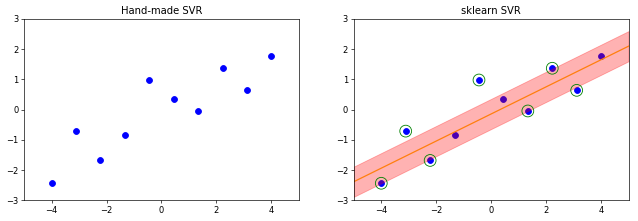

In [36]:

import matplotlib.pyplot as plt
import numpy as np
import warnings
import logging
import sys
from sklearn.svm import SVR

# convert warnings to error
warnings.filterwarnings("error")

def getLogger(name):
    logger = logging.getLogger(name)
    if len(logger.handlers) == 0:
        handler = logging.StreamHandler(sys.stdout)
        formatter = logging.Formatter('%(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        logger.setLevel(logging.WARNING)
    return logger

logger = getLogger("SMO for Regression")

MAX_DEPTH = 20
SPLIT_SECTIONS = 10

f = lambda x: .3*x

kernel = lambda x, y: x@y

def gen_data(n):
    noise = np.random.normal(0, .8, n)
    X = np.linspace(-4, 4, n)
    T = f(X) + noise
    return X.reshape(-1, 1), T

def draw_points(ax, X, T):
    for i in range(len(T)):
        ax.scatter(X[i][0], T[i], s=50, color='blue')
    return

class SMO:
    A = None
    X = None
    T = None
    E = None
    b = 0.0
    C = 0.0
    epsilon = 0.0
    eps = 1e-4
    
    def __init__(self, X, T, C, epsilon):
        length = len(T)
        self.X = X
        self.T = T
        self.C = C
        self.epsilon = epsilon
        # linear equality
        self.A = np.zeros(length)
        self.A[:length//2] = C/2
        self.A[length//2:length//2*2] = -C/2
        
        ynb = np.zeros(length)
        for i in range(length):
            ynb[i] = self.A@kernel(X, X[i])
        self.b = np.sum(T - ynb)/length
        self.E = ynb + self.b - T
        logger.info("Initialize \n A = {} \n b = {} \n E = {}".format(self.A, self.b, self.E))
        return
    
    def meet_KKT(self, i):
        # from the equation y = A @ kernel(X, x) we can find that X will expand the errors
        eps = self.eps*len(self.T)
        epsilon = self.epsilon
        y = self.A @ kernel(self.X, self.X[i]) + self.b
        logger.info("A[{}] = {} t = {}, y = {}".format(i, self.A[i], self.T[i], y))
        if abs(self.A[i])<eps and abs(self.T[i] - y)<epsilon:
            return 1
        if abs(self.A[i])>0 and abs(self.A[i])<self.C and abs(abs(self.T[i]-y)-epsilon)<eps:
            return 1
        if abs(self.A[i]-self.C)<eps and abs(self.T[i]-y)>epsilon:
            return 1
        return 0
    
    def optimize(self, i, j):
        if i==j:
            return 0
        a1 = self.A[i]
        a2 = self.A[j]
        x1 = self.X[i]
        x2 = self.X[j]
        t1 = self.T[i]
        t2 = self.T[j]
        E1 = self.E[i]
        E2 = self.E[j]
        C  = self.C
        b  = self.b
        k11 = kernel(x1, x1)
        k22 = kernel(x2, x2)
        k12 = kernel(x1, x2)
        eps = self.eps
        epsilon = self.epsilon
        s1 = np.sign(a1)
        s2 = np.sign(a2)
        w = a1 + a2
        
        L = max(-C, w-C)
        H = min(C, w+C)
        if L==H:
            logger.info("[{},{}] L==H={}".format(i, j, L))
            return 0
        eta = k11 + k22 - 2*k12
        
        if eta>0:
            if w > 0:
                cand_a2_new = a2 + (E1-E2+epsilon*(2))/eta
                if cand_a2_new <= L:
                    a2new = L
                elif cand_a2_new < 0:
                    a2new = cand_a2_new
                else:
                    cand_a2_new = a2 + (E1-E2+epsilon*(0))/eta
                    if cand_a2_new <= 0:
                        a2new = 0
                    elif cand_a2_new < w:
                        a2new = cand_a2_new
                    else:
                        cand_a2_new = a2 + (E1-E2+epsilon*(-2))/eta
                        if cand_a2_new <= w:
                            a2new = w
                        elif cand_a2_new < H:
                            a2new = cand_a2_new
                        else:
                            a2new = H
            elif w < 0:
                cand_a2_new = a2 + (E1-E2+epsilon*(2))/eta
                if cand_a2_new <= L:
                    a2new = L
                elif cand_a2_new < w:
                    a2new = cand_a2_new
                else:
                    cand_a2_new = a2 + (E1-E2+epsilon*(0))/eta
                    if cand_a2_new <= w:
                        a2new = w
                    elif cand_a2_new < 0:
                        a2new = cand_a2_new
                    else:
                        cand_a2_new = a2 + (E1-E2+epsilon*(-2))/eta
                        if cand_a2_new <= 0:
                            a2new = 0
                        elif cand_a2_new < H:
                            a2new = cand_a2_new
                        else:
                            a2new = H
            elif w == 0:
                cand_a2_new = a2 + (E1-E2+epsilon*(2))/eta
                if cand_a2_new <= L:
                    a2new = L
                elif cand_a2_new < 0:
                    a2new = cand_a2_new
                else:
                    cand_a2_new = a2 + (E1-E2+epsilon*(-2))/eta
                    if cand_a2_new <= 0:
                        a2new = 0
                    elif cand_a2_new < H:
                        a2new = cand_a2_new
                    else:
                        a2new = H

            logger.info("[{},{}] a2new = {} L = {}, H = {}".format(i, j, a2new, L, H))
            logger.info("eta = {}, E = {}".format(eta, self.E))
        else:
            raise Exception("second derivative non-positive!")
        if abs(a2 - a2new) < eps:
            logger.info('[{},{}] L={}, H={}, a2new={}'.format(i, j, L, H, a2new))
            logger.info('[{},{}] eta {} error {}'.format(i, j, eta, self.E))
            logger.info("[{},{}] a2==a2new = {}".format(i, j, a2new))
            return 0
        a1new = a1+a2-a2new
        self.A[i] = a1new
        self.A[j] = a2new
        
        n = 0
        b1new = 0
        b2new = 0
        
        if (a1new > 0 and a1new < C) or (a1new == C and E1 > -epsilon):
            b1new = -E1 - (a1new-a1)*k11 - (a2new-a2)*k12 - epsilon + b
            n = 1
            logger.info("[1 update b {},{}] a1 new {} non bound, error = {}".format(i, j, a1new, E1))
        elif (a1new < 0 and a1new > -C) or (a1new == -C and E1 < epsilon):
            b1new = -E1 - (a1new-a1)*k11 - (a2new-a2)*k12 + epsilon + b
            n = 1
            logger.info("[2 update b {},{}] a1 new {} non bound, error = {}".format(i, j, a1new, E1))
        elif (a2new > 0 and a2new < C) or (a2new == C and E2 > -epsilon):
            b2new = -E2 - (a1new-a1)*k12 - (a2new-a2)*k22 - epsilon + b
            n = 1
            logger.info("[3 update b {},{}] a2 new {} non bound, error = {}".format(i, j, a2new, E2))
        elif (a2new < 0 and a2new > -C) or (a2new == -C and E2 < epsilon):
            b2new = -E2 - (a1new-a1)*k12 - (a2new-a2)*k22 + epsilon + b
            n = 1
            logger.info("[4 update b {},{}] a2 new {} non bound, error = {}".format(i, j, a2new, E2))
        elif (a1new == 0 and abs(E1) > epsilon):
            b1new = -E1 - (a1new-a1)*k11 - (a2new-a2)*k12 + b
            n = 1
            logger.info("[5 update b {},{}] a1 new {}, error = {}".format(i, j, a1new, E1))
        elif (a2new == 0 and abs(E2) > epsilon):
            b2new = -E2 - (a1new-a1)*k12 - (a2new-a2)*k22 + b
            n = 1
            logger.info("[6 update b {},{}] a2 new {}, error = {}".format(i, j, a2new, E2))
        else:
            b1new = b
            n=1

#         if a1new > -C and a1new < C:
#             b1new = -E1 - (a1new-a1)*k11 - (a2new-a2)*k12 + b
#             n = 1
#             logger.info("[{},{}] a1 new non bound".format(i, j))
#         elif a2new > -C and a2new < C:
#             b2new = -E2 - (a1new-a1)*k12 - (a2new-a2)*k22 + b
#             n = 1
#             logger.info("[{},{}] a2 new non bound".format(i, j))
#         else:
#             b1new = -E1 - (a1new-a1)*k11 - (a2new-a2)*k12 + b
#             b2new = -E2 - (a1new-a1)*k12 - (a2new-a2)*k22 + b
#             n = 2
#             logger.info("[{},{}] a1 new a2 new bound".format(i, j))
        bnew = (b1new + b2new)/n
        self.b = bnew
        
        for k in range(len(self.X)):
            self.E[k] = self.E[k] + (a1new-a1)*kernel(x1, self.X[k]) + (a2new-a2)*kernel(x2, self.X[k]) + (bnew - b)
        return 1

    def pair_optimize(self, i):
        length = len(self.T)
        j = np.argmax(np.abs(self.E[i] - self.E))
        update = self.optimize(i, j)
        if update==1:
            logger.info("[{},{}] A = {}".format(i, j, self.A))
            return update
        for j in range(length):
            if self.A[j]>-self.C and self.A[j]<self.C:
                update = self.optimize(i, j)
                if update == 1:
                    logger.info("[{},{}] A = {}".format(i, j, self.A))
                    return update
        for j in range(length):
            if self.A[j]<=-self.C or self.A[j]>=self.C:
                update = self.optimize(i, j)
                if update == 1:
                    logger.info("[{},{}] A = {}".format(i, j, self.A))
                    return update
        return 0

    def train(self):
        length = len(self.T)
        finished = 0
        initialized = 1
        count = 0
        while finished != 1:
            count += 1
            if count == 1000:
                logger.warning("too long!!!!!")
                break
            if initialized==1 or validation==1:
                initialized = 0
                validation = 0
                update = 0
                for i in range(length):
                    update = self.pair_optimize(i)
                if update == 0:
                    finished = 1
            else:
                while True:
                    # find the multiplier that violate KKT condition
                    idx = -1
                    update = 0
                    for i in range(length):
                        if self.A[i]>-self.C and self.A[i]<self.C:
                            is_kkt = self.meet_KKT(i)
                            logger.info("[{}] non bound update meet KKT:{}".format(i, is_kkt))
                            if is_kkt==0:
                                idx = i
                                update += self.pair_optimize(i)
                    # if update == 0, means the parameter a could already be the best, then update the threshold b
                    if update == 0:
                        b = self.b
                        bnew = 0.0
                        n = 0
                        for k in range(len(self.A)):
                            if abs(self.A[k]) > 0 and abs(self.A[k]) < self.C:
                                bnew += self.T[k] - self.A@kernel(self.X, self.X[k])
                                n += 1
                        if n != 0:
                            bnew = bnew/n
                            self.b = bnew
                            self.E = self.E - b + bnew
                    # if all non-bound multipliers meet the KKT conditions
                    if idx == -1:
                        break
                validation = 1
        return

    def draw(self, ax):
        epsilon = self.epsilon
        logger.info("lagrange multiplier {}".format(self.A))
        x = np.array([-5, 5])
        y = np.zeros(x.shape)
        w = self.A@self.X
        logger.info("w = {}, b = {}".format(w, self.b))
        y[0] = self.b + w[0] * x[0]
        y[1] = self.b + w[0] * x[1]
        ax.plot(x, y, color='C1')
        
        ax.fill_between(x, y-epsilon, y+epsilon, color='r', alpha=.3)
        
        for i in range(len(self.T)):
            if abs(self.A[i]) > 1e-10:
                ax.scatter(self.X[i][0], self.T[i], s=200, edgecolors='green', facecolors='none')
        return

def sklearn_SVR(ax, X, T, C, epsilon):
    svr = SVR(kernel='linear', C= C, epsilon=epsilon)
    svr.fit(X, T)
    n = np.sum(svr.n_support_)
    w = svr.coef_.reshape(-1, 1)
    idxs = svr.support_
    a = svr.dual_coef_.reshape(-1,1)
    b = svr.intercept_ 
    y = svr.predict(X[idxs])
    logger.info("a = {}\n idxs = {}\n w = {}\n b={}".format(a, idxs, w, b))
    
    x = np.array([-5, 5])
    y = np.zeros(x.shape)
    y[0] = b + w[0] * x[0]
    y[1] = b + w[0] * x[1]
    ax.plot(x, y, color='C1')
    
    ax.fill_between(x, y-epsilon, y+epsilon, color='r', alpha=.3)
    
    ax.scatter(X[idxs], T[idxs], s=200, edgecolors='green', facecolors='none')
    return

def main():
    fig = plt.figure(figsize=(13,4), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    X, T = gen_data(10)
    xmin = -5
    xmax = 5
    ymin = -3
    ymax = 3
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(ymin, ymax)
    ax1.set_title("Hand-made SVR")
    ax2.set_title("sklearn SVR")
    draw_points(ax1, X, T)
    draw_points(ax2, X, T)

    C = 10
    epsilon = .5
    
    sklearn_SVR(ax2, X, T, C, epsilon)
    
    smo = SMO(X, T, C, epsilon)
    smo.train()
    smo.draw(ax1)
    
    plt.show()

if __name__=="__main__":
    main()

In [ ]:
%%time
C = 6
length = 11
A = np.zeros(length)
print(length//2)
A[:length//2] = C//2
A[length//2+1:] = -C//2
print(A)
print(np.sign(A[-1]))